# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
from sklearn.cluster import KMeans

from sklearn.manifold import MDS
import mpl_toolkits.mplot3d
import random

## From https://stackoverflow.com/questions/10374930/matplotlib-annotating-a-3d-scatter-plot
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [2]:
# Load the data
raw_data = pd.read_csv('Data for Clustering - Density.txt')
# Check the data
raw_data

,Partido,Count_Words,Count_Different,abandono escolar,acesso,administração,administração pública,ambiente,apenas,apoio,...,tem,todo,trabalhador,trabalhar,valor,vida,área,é,é essencial,é necessário
0,BE,38763,128,103.191187,2605.577484,825.529500,361.169156,670.742719,1547.867812,2863.555452,...,3921.265124,4127.647499,2786.162062,3998.658515,2657.173077,1160.900859,2321.801718,8719.655341,51.595594,438.562547
1,CH,2309,106,0.000000,2165.439584,433.087917,0.000000,0.000000,866.175834,1299.263751,...,433.087917,2598.527501,866.175834,1299.263751,866.175834,3031.615418,2165.439584,5630.142919,0.000000,0.000000
2,IL,102905,133,524.755843,3167.970458,2186.482678,1098.100189,621.932851,1797.774647,1613.138331,...,4888.003498,3955.104222,1535.396725,1992.128662,1642.291434,1156.406394,1914.387056,11282.250620,553.908945,719.109859
3,Livre,20294,129,0.000000,3449.295358,1084.064255,788.410368,1527.545087,985.512959,3252.192766,...,1823.198975,7687.001084,2020.301567,4730.462206,1626.096383,2118.852863,2168.128511,3991.327486,147.826944,591.307776
4,PCP,28417,131,70.380406,2287.363198,1724.319949,1126.086498,1829.890558,668.613858,3167.118274,...,3976.492944,3413.449696,774.184467,2041.031777,1618.749340,2076.221980,2392.933807,9958.827462,175.951015,527.853046
5,PS,32349,126,30.912857,3184.024236,2689.418529,1916.597113,710.995703,556.431420,5564.314198,...,1143.775696,4915.144208,1762.032829,3462.239946,1421.991406,1854.771399,3338.588519,4204.148505,340.041423,247.302853
6,PSD,38165,130,26.202018,1807.939211,1703.131141,1100.484737,3484.868335,707.454474,3118.040089,...,4742.565178,3904.100616,602.646404,1912.747282,1991.353334,2096.161404,3118.040089,10323.594917,157.212105,733.656492


## Select the features

In [3]:
x = raw_data.iloc[:,1:len(raw_data.columns)]
x

,Count_Words,Count_Different,abandono escolar,acesso,administração,administração pública,ambiente,apenas,apoio,assegurar,...,tem,todo,trabalhador,trabalhar,valor,vida,área,é,é essencial,é necessário
0,38763,128,103.191187,2605.577484,825.529500,361.169156,670.742719,1547.867812,2863.555452,335.371359,...,3921.265124,4127.647499,2786.162062,3998.658515,2657.173077,1160.900859,2321.801718,8719.655341,51.595594,438.562547
1,2309,106,0.000000,2165.439584,433.087917,0.000000,0.000000,866.175834,1299.263751,866.175834,...,433.087917,2598.527501,866.175834,1299.263751,866.175834,3031.615418,2165.439584,5630.142919,0.000000,0.000000
2,102905,133,524.755843,3167.970458,2186.482678,1098.100189,621.932851,1797.774647,1613.138331,1797.774647,...,4888.003498,3955.104222,1535.396725,1992.128662,1642.291434,1156.406394,1914.387056,11282.250620,553.908945,719.109859
3,20294,129,0.000000,3449.295358,1084.064255,788.410368,1527.545087,985.512959,3252.192766,1330.442495,...,1823.198975,7687.001084,2020.301567,4730.462206,1626.096383,2118.852863,2168.128511,3991.327486,147.826944,591.307776
4,28417,131,70.380406,2287.363198,1724.319949,1126.086498,1829.890558,668.613858,3167.118274,844.564873,...,3976.492944,3413.449696,774.184467,2041.031777,1618.749340,2076.221980,2392.933807,9958.827462,175.951015,527.853046
5,32349,126,30.912857,3184.024236,2689.418529,1916.597113,710.995703,556.431420,5564.314198,1854.771399,...,1143.775696,4915.144208,1762.032829,3462.239946,1421.991406,1854.771399,3338.588519,4204.148505,340.041423,247.302853
6,38165,130,26.202018,1807.939211,1703.131141,1100.484737,3484.868335,707.454474,3118.040089,1048.080702,...,4742.565178,3904.100616,602.646404,1912.747282,1991.353334,2096.161404,3118.040089,10323.594917,157.212105,733.656492


## Clustering

In [4]:
distortions = []
K = range(1,7)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    distortions.append(kmeans.inertia_)    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


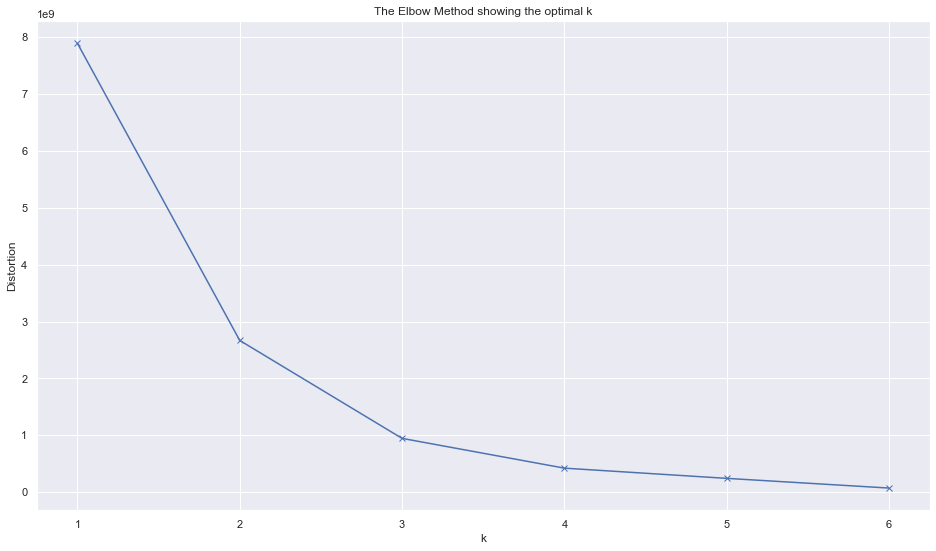

In [5]:
plt.figure(figsize=(16,9))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()    

## Clustering results

In [6]:
K = range(2,4)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    identified_clusters = kmeans.fit_predict(x)
    parties=raw_data['Partido'].tolist() 
    identified_clusters
    print(np.vstack((parties, identified_clusters)).T)

[['BE' '0']
 ['CH' '0']
 ['IL' '1']
 ['Livre' '0']
 ['PCP' '0']
 ['PS' '0']
 ['PSD' '0']]
[['BE' '1']
 ['CH' '2']
 ['IL' '0']
 ['Livre' '1']
 ['PCP' '1']
 ['PS' '1']
 ['PSD' '1']]


In [7]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
import scipy.spatial as sp, scipy.cluster.hierarchy as hc

x.index=raw_data['Partido'].tolist()
pwdist = pdist(x, metric='euclidean')

## Create a square dataframe with the pairwise distances: the distance matrix
distmat = pd.DataFrame(
    squareform(pwdist), # pass a symmetric distance matrix
    columns = x.index,
    index = x.index
)

## Normalise by scaling between 0-1, using dataframe max value to keep the symmetry.
## This is essentially a cosmetic step to 

distmat_mm=((distmat-distmat.min().min())/(distmat.max().max()-distmat.min().min()))*1


## Affinity matrix
affinmat_mm = pd.DataFrame(1-distmat_mm, distmat.index, distmat.columns)

#pd.DataFrame(distmat_mm, distmat.index, distmat.columns)

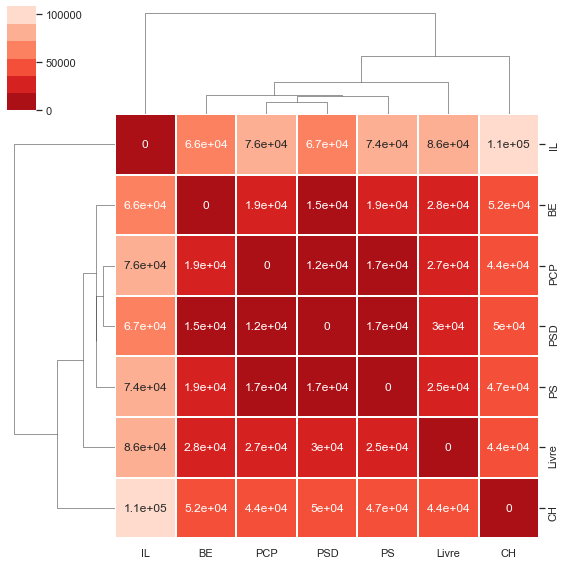

In [8]:
## Perform hierarchical linkage on the distance matrix using Ward's method.
distmat_link = hc.linkage(pwdist, method="ward", optimal_ordering=True )

sns.clustermap(
    distmat,
    annot = True,
    cmap=sns.color_palette("Reds_r"),
    linewidth=1,
    #standard_scale=1,
    row_linkage=distmat_link,
    col_linkage=distmat_link,
    figsize=(8,8)).fig ##.suptitle('Portuguese Parties Programs/Manifest, Clustermap')

plt.show()

In [9]:
mds = MDS(n_components=1, dissimilarity='precomputed',random_state=2020, n_init=100, max_iter=1000)

## We use the normalised distance matrix but results would
## be similar with the original one, just with a different scale/axis
results = mds.fit(distmat_mm.values)

ExportMDS = pd.DataFrame(columns = ['Partido', '1Dimension1'])

for i in range(len(raw_data['Partido'])):
    ExportMDS = ExportMDS.append({'Partido': parties[i], 
                      '1Dimension1' : results.embedding_[i][0]},
                      ignore_index = True)

ExportMDS.to_csv('MDS Data.txt', index=True, mode='w', header=True, encoding='utf-8-sig')    
    
ExportMDS.sort_values(by=['1Dimension1'])

,Partido,1Dimension1
1,CH,-0.455939
3,Livre,-0.200697
5,PS,-0.072914
4,PCP,-0.025237
0,BE,0.047981
6,PSD,0.076034
2,IL,0.630771


In [10]:
mds = MDS(n_components=2, dissimilarity='precomputed',random_state=2020, n_init=100, max_iter=1000)

## We use the normalised distance matrix but results would
## be similar with the original one, just with a different scale/axis
results = mds.fit(distmat_mm.values)
coords = results.embedding_

ExportMDS['2Dimension1'] = coords[:,0]
ExportMDS['2Dimension2'] = coords[:,1]
ExportMDS.to_csv('MDS Data.txt', index=True, mode='w', header=True, encoding='utf-8-sig')    
ExportMDS

,Partido,1Dimension1,2Dimension1,2Dimension2
0,BE,0.047981,-0.056858,-0.046517
1,CH,-0.455939,0.407483,0.151521
2,IL,0.630771,-0.609872,0.126818
3,Livre,-0.200697,0.174545,-0.186021
4,PCP,-0.025237,0.074650,0.030731
5,PS,-0.072914,0.024616,-0.122684
6,PSD,0.076034,-0.014564,0.046151


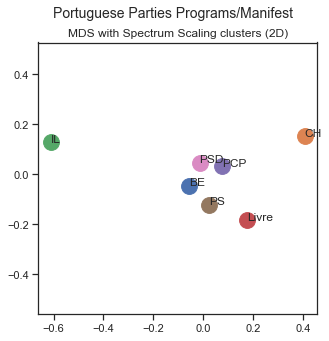

In [11]:
sns.set()
sns.set_style("ticks")

fig, ax = plt.subplots(figsize=(5,5))
fig.suptitle('Portuguese Parties Programs/Manifest', fontsize=14)
ax.set_title('MDS with Spectrum Scaling clusters (2D)')

for label, x, y in zip(distmat_mm.columns, coords[:, 0], coords[:, 1]):
    ax.scatter(x, y, s=250)
    ax.axis('equal')
    ax.annotate(label,xy = (x, y))

plt.show()

In [12]:
class Annotation3D(Annotation):
    '''Annotate the point xyz with text s'''

    def __init__(self, s, xyz, *args, **kwargs):
        Annotation.__init__(self,s, xy=(0,0), *args, **kwargs)
        self._verts3d = xyz        

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.xy=(xs,ys)
        Annotation.draw(self, renderer)
        
def annotate3D(ax, s, *args, **kwargs):
    '''add anotation text s to to Axes3d ax'''

    tag = Annotation3D(s, *args, **kwargs)
    ax.add_artist(tag)
mds = MDS(n_components=3, dissimilarity='precomputed',random_state=1234, n_init=100, max_iter=1000)
results = mds.fit(distmat.values)
parties = distmat.columns
coords = results.embedding_

ExportMDS['3Dimension1'] = coords[:,0]
ExportMDS['3Dimension2'] = coords[:,1]
ExportMDS['3Dimension3'] = coords[:,2]
ExportMDS.to_csv('MDS Data.txt', index=True, mode='w', header=True, encoding='utf-8-sig')    
ExportMDS

,Partido,1Dimension1,2Dimension1,2Dimension2,3Dimension1,3Dimension2,3Dimension3
0,BE,0.047981,-0.056858,-0.046517,-5268.412264,962.086841,5013.552116
1,CH,-0.455939,0.407483,0.151521,36383.169878,-28293.520684,7923.123992
2,IL,0.630771,-0.609872,0.126818,-64653.503321,5821.931700,-17145.227765
3,Livre,-0.200697,0.174545,-0.186021,14377.381112,7497.712654,20138.628062
4,PCP,-0.025237,0.074650,0.030731,9931.024179,-1038.820842,-6042.725569
5,PS,-0.072914,0.024616,-0.122684,8863.155540,13323.904833,-1600.324590
6,PSD,0.076034,-0.014564,0.046151,367.184877,1726.705498,-8287.026245


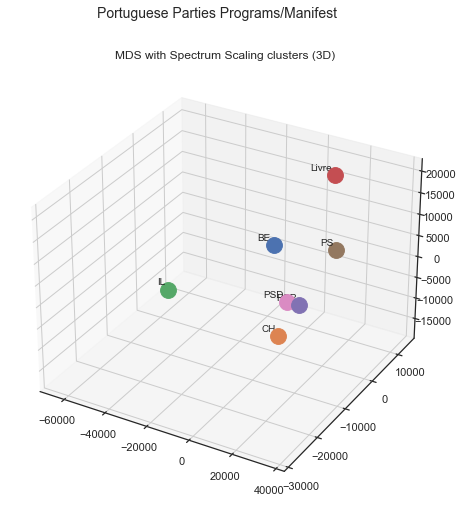

In [13]:
sns.set()
sns.set_style("ticks")

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

fig.suptitle('Portuguese Parties Programs/Manifest', fontsize=14)
ax.set_title('MDS with Spectrum Scaling clusters (3D)')

for label, x, y, z in zip(parties, coords[:, 0], coords[:, 1], coords[:, 2]):
    #print(label,pmds_colors[label])
    ax.scatter(x, y, z, s=250)
    annotate3D(ax, s=str(label), xyz=[x,y,z], fontsize=10, xytext=(-3,3),
               textcoords='offset points', ha='right',va='bottom')  
plt.show()

In [14]:
mds = MDS(n_components=4, dissimilarity='precomputed',random_state=2020, n_init=100, max_iter=1000)

## We use the normalised distance matrix but results would
## be similar with the original one, just with a different scale/axis
results = mds.fit(distmat_mm.values)
coords = results.embedding_

ExportMDS['4Dimension1'] = coords[:,0]
ExportMDS['4Dimension2'] = coords[:,1]
ExportMDS['4Dimension3'] = coords[:,2]
ExportMDS['4Dimension4'] = coords[:,3]
ExportMDS.to_csv('MDS Data.txt', index=True, mode='w', header=True, encoding='utf-8-sig')    
ExportMDS

,Partido,1Dimension1,2Dimension1,2Dimension2,3Dimension1,3Dimension2,3Dimension3,4Dimension1,4Dimension2,4Dimension3,4Dimension4
0,BE,0.047981,-0.056858,-0.046517,-5268.412264,962.086841,5013.552116,-0.037569,-0.013999,0.091271,-0.012367
1,CH,-0.455939,0.407483,0.151521,36383.169878,-28293.520684,7923.123992,0.294895,-0.039591,-0.048838,0.296861
2,IL,0.630771,-0.609872,0.126818,-64653.503321,5821.931700,-17145.227765,-0.376095,0.445227,-0.007641,-0.199679
3,Livre,-0.200697,0.174545,-0.186021,14377.381112,7497.712654,20138.628062,0.164415,-0.131836,0.072351,-0.103841
4,PCP,-0.025237,0.074650,0.030731,9931.024179,-1038.820842,-6042.725569,0.001432,-0.115674,-0.002166,0.057571
5,PS,-0.072914,0.024616,-0.122684,8863.155540,13323.904833,-1600.324590,0.030549,-0.080797,-0.080167,-0.058386
6,PSD,0.076034,-0.014564,0.046151,367.184877,1726.705498,-8287.026245,-0.077628,-0.063329,-0.024811,0.019841


In [15]:
from sklearn.manifold import MDS
import mpl_toolkits.mplot3d
import random

distortions = []
K = range(1,6)
for k in K:
    mds = MDS(n_components=k, dissimilarity='precomputed',random_state=1234, n_init=100, max_iter=1000)
    results = mds.fit(distmat.values)
    distortions.append(mds.stress_)

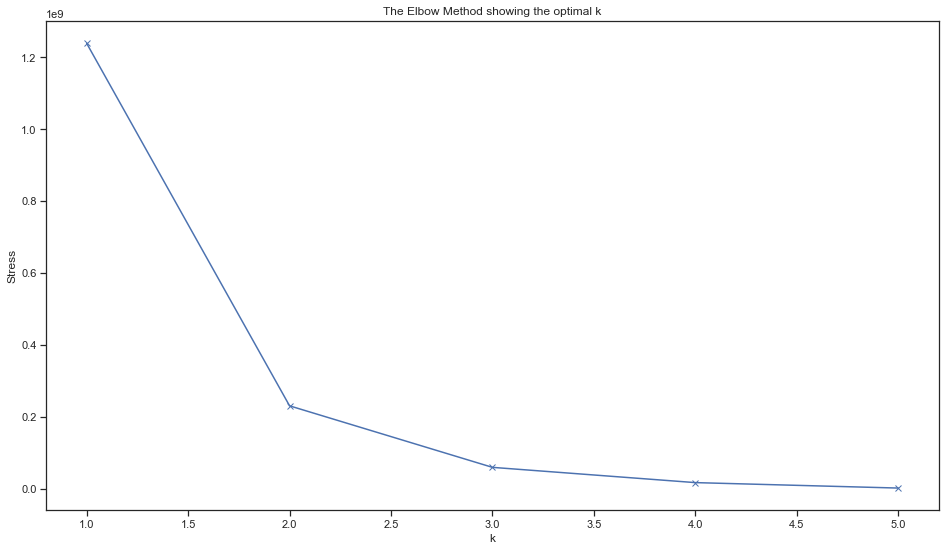

In [16]:
plt.figure(figsize=(16,9))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Stress')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [17]:
mds.get_params(deep=True) #[source]

{'dissimilarity': 'precomputed',
 'eps': 0.001,
 'max_iter': 1000,
 'metric': True,
 'n_components': 5,
 'n_init': 100,
 'n_jobs': None,
 'random_state': 1234,
 'verbose': 0}